In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt

def get_wordCloud(tuples):
    """
    Make WordCloud
    Ïó¨Îü¨Í∞úÏùò Î¨∏ÏûêÏó¥Î°ú Ïù¥Î£®Ïñ¥ÏßÑ ÌäúÌîåÏùÑ Ïù∏ÏûêÎ°ú Î∞õÎäîÎã§.
    ÎßåÎì§Ïñ¥ÏßÑ imgÎ•º Î¶¨ÌÑ¥ÌïúÎã§.
    """
    # ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú ÎßåÎì§Ïñ¥Ï£ºÎäî ÏûëÏóÖ / ÌäúÌîåÏïàÏóêÏÑú ÌäúÌîåÍ∫ºÎÇ¥Í∏∞
    longStr = ''.join([text for tuple in tuples for text in tuple])

    # ÌòïÌÉúÏÜå Î∂ÑÏÑù Î∞è Ïπ¥Ïö¥ÌÑ∞ - ÌïúÍ∏ÄÎßå
    okt = Okt()
    nouns = okt.nouns(longStr)
    counter = Counter(nouns)

    wordcloud = WordCloud(
        font_path ="./BMJUA.ttf",
        width=800,
        height=600,
        max_words=80,
        prefer_horizontal=1,
        max_font_size=250,
        background_color='white',
    )

    img = wordcloud.generate_from_frequencies(counter)
    return img

In [5]:
# DB
import pymysql as db
import pprint

local = 'team0402.c43ypw0liaa2.ap-northeast-2.rds.amazonaws.com'  # aws rds Ï†ëÍ∑º
con = db.connect(
    host=local,
    user='team0402',
    db='Team0402_Youtube',
    password='team0402',
    charset='utf8mb4'
)
cur = con.cursor()

def get_result_byQuery(query):
    cur.execute(query)
    return cur.fetchall()

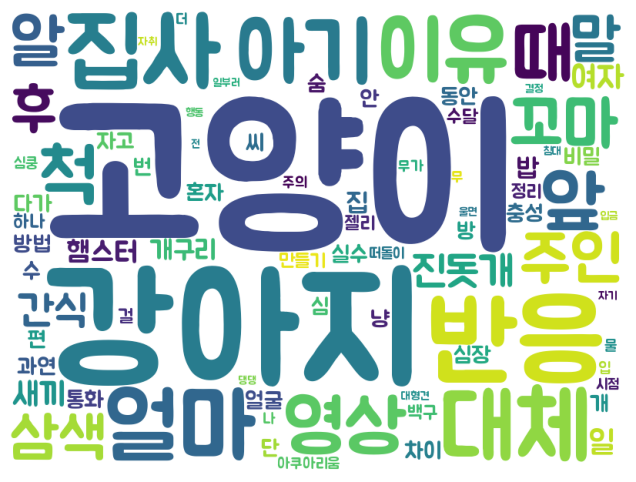

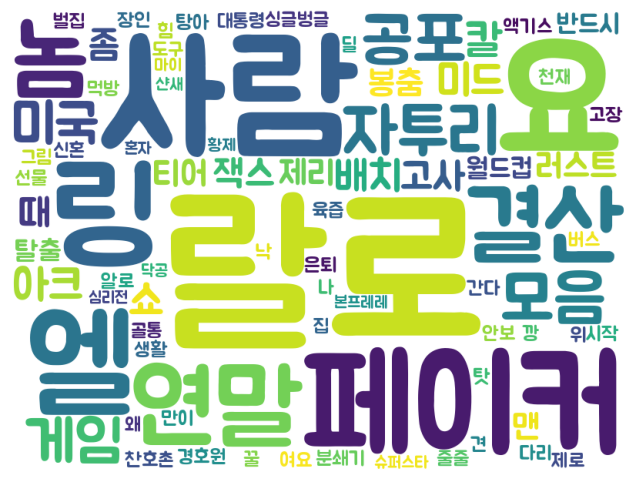

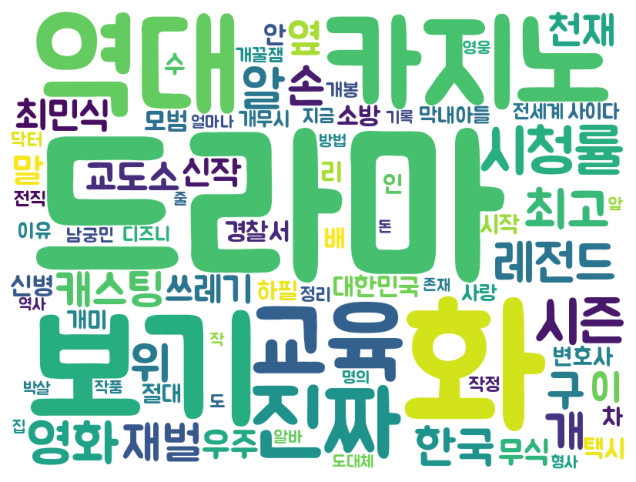

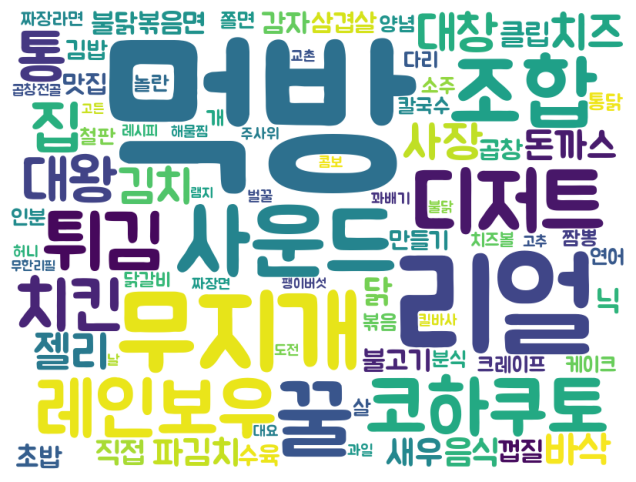

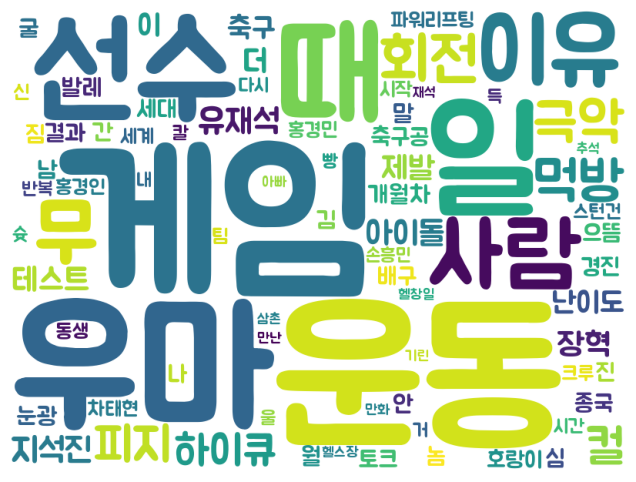

In [6]:
# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ÏóêÏÑú ÏÉÅÏúÑ Ï°∞ÌöåÏàò ÏòÅÏÉÅ 100Í∞ú Ï†úÎ™© WordCloud
# Í≤∞Í≥ºÎ¨ºÏùÑ Ï†ÄÏû•
category_names = ['ANIMAL', 'GAME', 'MOVIE', 'MUKBANG', 'SPORTS']

for category in category_names:
    query_result = get_result_byQuery(
        """
        SELECT v.video_title
        FROM TB_CHANNEL_INFO as ch
        INNER JOIN TB_VIDEO_INFO as v ON ch.channel_id = v.channel_id
        WHERE ch.category = '{}'
        ORDER BY v.view_count desc LIMIT 100;
        """.format(category)
    )
    plt.figure(figsize=(8,6))
    plt.axis('off')
    plt.imshow(get_wordCloud(query_result))
    plt.savefig('wordcloud/{}/{}_CHANNEL_VIDEO_WORDCLOUD.png'.format(category, category))

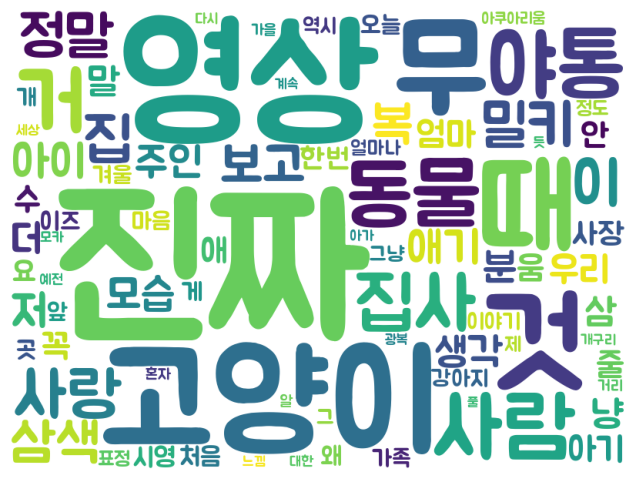

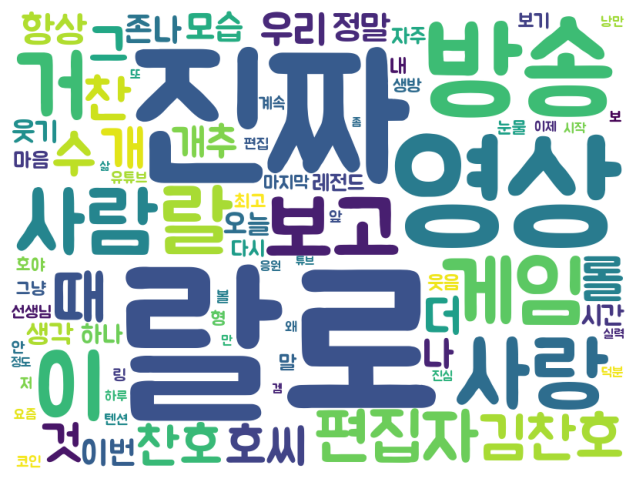

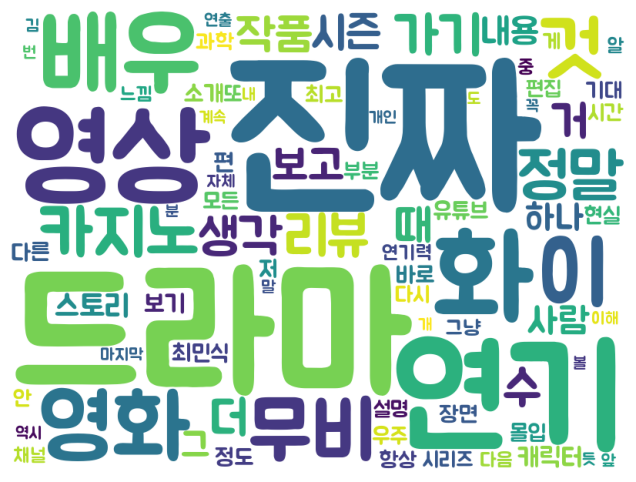

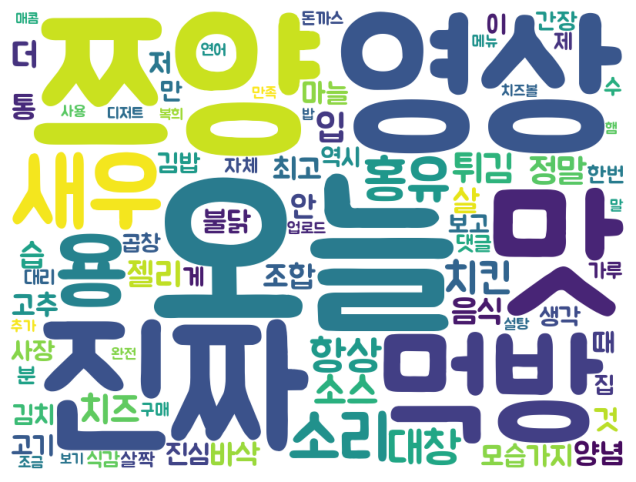

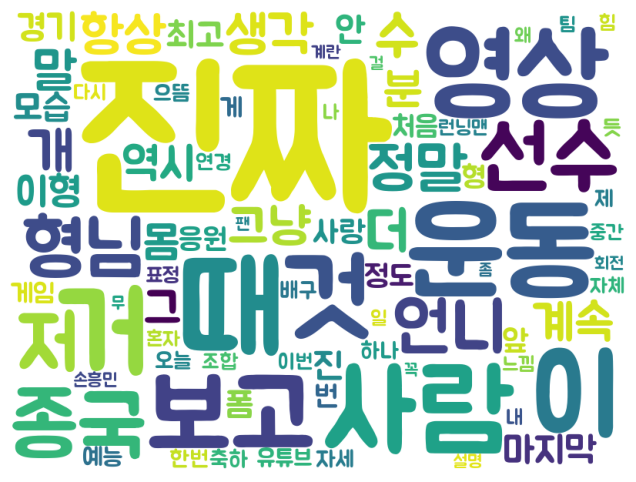

In [9]:
# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ÏóêÏÑú ÏÉÅÏúÑ Ï°∞ÌöåÏàò ÏòÅÏÉÅ 100Í∞úÏùò ÎçßÍ∏Ä WordCloud
# Í≤∞Í≥ºÎ¨ºÏùÑ Ï†ÄÏû•
for category in category_names:
    query_result = get_result_byQuery(
        """
        SELECT cmt.content
        FROM TB_COMMENT_INFO as cmt
        INNER JOIN TB_VIDEO_INFO as v ON cmt.video_id = v.video_id
        INNER JOIN (
        SELECT v.video_id
        FROM TB_CHANNEL_INFO as ch
        INNER JOIN TB_VIDEO_INFO as v ON ch.channel_id = v.channel_id
        WHERE ch.category ='{}'
        ORDER BY v.view_count desc
        LIMIT 100
        ) as top_videos ON v.video_id = top_videos.video_id;
        """.format(category)
    )

    plt.figure(figsize=(8,6))
    plt.axis('off')
    plt.imshow(get_wordCloud(query_result))
    plt.savefig('wordcloud/{}/{}_CHANNEL_COMMENT_WORDCLOUD.png'.format(category,category))

In [5]:
# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∞ÄÏû• Ïù∏Í∏∞ ÎßéÏïòÎçò ÎåìÍ∏Ä 3Í∞ú
for category in category_names:
    query_result = get_result_byQuery(
        """
        SELECT cmt.content
        FROM TB_CHANNEL_INFO as ch
        INNER JOIN TB_VIDEO_INFO as v ON ch.channel_id = v.channel_id
        INNER JOIN TB_COMMENT_INFO as cmt ON v.video_id = cmt.video_id
        WHERE ch.category = '{}'
        ORDER BY cmt.like_count desc LIMIT 3;
        """.format(category)
    )
    print("\n----------{}----------\n".format(category))
    pprint.pprint(query_result)


----------ANIMAL----------

(('ÎèôÎ¨ºÎì§ÏùÄ Ìò∏Ìù°Ïù¥ÎÇò ÎÉÑÏÉà Ïò®ÎèÑÎì±ÏúºÎ°ú ÏúÑÍ∏âÏÉÅÌô©ÏùÑ ÌåêÎã®ÌïúÎãµÎãàÎã§ Ïã¨ÏßÄÏñ¥ Ïã¨Ïû• Î∞ïÎèôÏù¥ÎÇò Î∞∞ÏÑ§Î¨ºÏùò ÎÉÑÏÉàÎ°úÎèÑ ÌåêÎã®ÌïúÎã§Í≥†ÌïòÎãà ÎèôÎ¨ºÏûÖÏû•ÏóêÏÑúÎäî ‚ÄúÏò§Îäò '
  'Î∞•ÏùÄ Ï¢Ä ÏÉàÎ°≠Í≤å Ï£ºÎÑ§‚Äù ÏàòÏ§ÄÏù¥ÏóàÏùÑÍ≤ÅÎãàÎã§!',),
 ('Ï≤òÏùåÏóî ÎØ∏ÏïàÌï¥ÏÑú Îã¨ÎûòÏ§¨ÏßÄÎßå ÏóÑÏÇ¥Ïù¥ Ïã¨ÌïúÍ±∏ Î≥¥Í≥† ‚ÄúÌûàÏúµ~‚Äù Í∞ÄÏÑú Í∞ÄÎ≤ÑÎ¶∞Í≤å ÌïôÍ≥ÑÏùò Ï†ïÏÑ§ÏûÖÎãàÎã§.',),
 ('Ïç∏ÎÑ¨Î≥¥Í≥† ÏñºÏ≤ôÏóÜÏñ¥ÏÑú Îã¨Î†§ÏôîÏñ¥Ïöî „Öã„Öã„Öã„Öã„Öã„ÖãüòÇ',))

----------GAME----------

(('ÌïòÎßàÏùò Ïã¨Î¶¨Î•º ÌååÏïÖÌï¥ÏÑú Ìï®Ï†ïÏùÑ ÎßåÎì§Ïñ¥ÎëêÏã† ÎèÖÏÇ¨Î∂ÑÎèÑ ÎåÄÎã®ÌïòÏãúÍ≥† ÌòπÏãú ÎèÖÏÇ¨Î∂ÑÏù¥ ÏÑúÏö¥ÌïòÏã§ÍπåÎ¥ê Î™®Îì† Ìï®Ï†ïÏóê Í±∏Î¶¨Îäî ÌïòÎßàÌòïÎèÑ ÎÑàÎ¨¥ '
  'ÏõÉÍπÄ„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã',),
 ('ÏßÄÏºúÏ§òÏïº Ìï† Í≤É Í∞ôÏùÄ ÎÇ®Ïûê 1ÏúÑ„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã',),
 ('ÏßÑÏßú Ï†Ä Í±∞ÏúÑÎäî Ïñ∏Ï†úÎ¥êÎèÑ ÏõÉÏùåÎ≤ÑÌäº„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã',))

----------MOVIE----------

(('Ïù¥Í≤å ÏóÑÏ≤≠ ÏòõÎÇ†ÎèÑ ÏïÑÎãå 100ÎÖÑÏ†

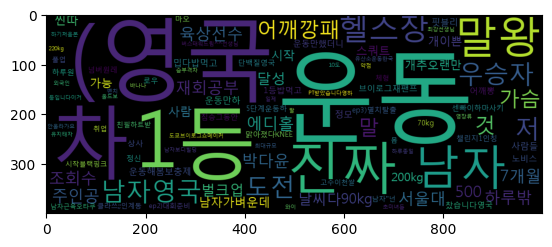

In [6]:
# ÌäπÏ†ï Ïú†ÌäúÎ≤Ñ Î™®Îì† ÏòÅÏÉÅÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® Ï†úÎ™© WordCloud
# Í≤∞Í≥ºÎ¨ºÏùÑ Ï†ÄÏû•

for category in category_names:
    channel_ids_inCategory = get_result_byQuery(
        """
        SELECT channel_id
        FROM TB_CHANNEL_INFO
        WHERE category ='{}'
        """.format(category)
    )

    for channel_id in channel_ids_inCategory:
        query_result = get_result_byQuery(
            """
            SELECT video_title
            FROM TB_VIDEO_INFO
            WHERE channel_id = '{}'
            """.format(channel_id[0])
        )
        plt.figure(figsize=(8,6))
        plt.axis('off')
        plt.imshow(get_wordCloud(query_result))
        plt.savefig('wordcloud/{}/{}_TITLE_WORDCLOUD.png'.format(category,channel_id[0]))

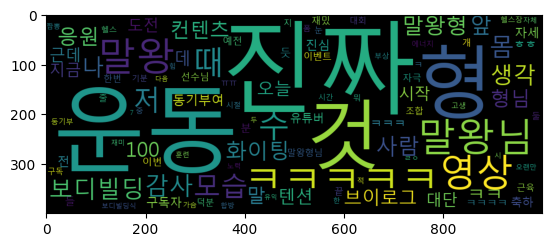

In [5]:
# ÌäπÏ†ï Ïú†ÌäúÎ≤Ñ Î™®Îì† ÏòÅÏÉÅÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® ÎåìÍ∏Ä WordCloud
# Í≤∞Í≥ºÎ¨ºÏùÑ Ï†ÄÏû•

for category in category_names:
    channel_ids_inCategory = get_result_byQuery(
        """
        SELECT channel_id
        FROM TB_CHANNEL_INFO
        WHERE category ='{}'
        """.format(category)
    )

    for channel_id in channel_ids_inCategory:
        query_result = get_result_byQuery(
            """
            SELECT cmt.content
            FROM TB_VIDEO_INFO as v
            INNER JOIN TB_COMMENT_INFO as cmt ON v.video_id = cmt.video_id
            WHERE v.channel_id = '{}'
            """.format(channel_id[0])
        )
        plt.figure(figsize=(8,6))
        plt.axis('off')
        plt.imshow(get_wordCloud(query_result))
        plt.savefig('wordcloud/{}/{}_COMMENT_WORDCLOUD.png'.format(category,channel_id[0]))

In [8]:
# Í∞Å Ïú†ÌäúÎ≤ÑÎ≥Ñ Í∞ÄÏû• Ïù∏Í∏∞ ÎßéÏïòÎçò ÎåìÍ∏Ä 3Í∞ú
for category in category_names:
    channel_ids_inCategory = get_result_byQuery(
        """
        SELECT channel_id
        FROM TB_CHANNEL_INFO
        WHERE category ='{}'
        """.format(category)
    )
    print("{}".format(category))
    for channel_id in channel_ids_inCategory:
        query_result = get_result_byQuery(
            """
            SELECT cmt.content
            FROM TB_VIDEO_INFO as v
            INNER JOIN TB_COMMENT_INFO as cmt ON v.video_id = cmt.video_id
            WHERE v.channel_id = '{}'
            ORDER BY cmt.like_count DESC LIMIT 3
            """.format(channel_id[0])
        )
        print("\n----------{}----------\n".format(channel_id[0]))
        pprint.pprint(query_result)

ANIMAL

----------UC22go5LdQEw-iDuxFb4C0hw----------

(('3ÎÖÑÌõÑÎèÑ ÏïÑÎãàÍ≥† 13ÎÖÑÌõÑÎùºÎãà ÎÑò Í∞êÎèôÏä§ÎüΩ....Îö†ÎÉ•Ïù¥Î°ú Ïûò ÏÑ±Ïû•Ìï¥Ï£ºÏóàÍµ∞ „Ö†„Ö† Î≥¥Ìò∏ÏûêÎãòÍªò Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§.',),
 ('ÏßÑÏßú Íµ¨Ï°∞Ìï¥ Ï£ºÏãúÍ≥† ÏπòÎ£åÌï¥ Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§.  ÎààÎ¨ºÏù¥ Î©àÏ∂îÏßà ÏïäÎÑ§Ïöî. ÎÑê Í∑∏Î†áÍ≤å ÎßåÎì† ÏßêÏäπÎ≥¥Îã§ Î™ªÌïú Ïù∏Í∞ÑÏùÄ Ï≤úÎ≤åÏùÑ Î∞õÏùÑÍ∫ºÏïº. Íº≠ '
  'ÌûòÎÇ¥Î†¥ ÏïÑÍ∞ÄÏïºü´Ç',),
 ('ÏñºÎßàÎÇò ÏÜåÎ¶¨Î•º ÏßàÎ†ÄÏúºÎ©¥ Î™©Ïù¥ Îã§ Ïâ¨ÏóàÎÑ§..',))

----------UC29-IlHm6kbDB1ox8GthODw----------

(('ÌååÏù¥ÌîÑ ÏïàÏóêÏÑú Îç∞Î†§Ïò® Ïö∞Î¶¨ ÎàÑÎ¶¨Ï¶àÎì§ÏùÑ Ï∂îÏñµÌïòÎ©∞  üòç',),
 ('Ïù∏ÏÉùÏùÄ ÍπåÏπ†Ïù¥Ï≤òÎüº\n'
  'Í∞ÄÏ°±ÏóêÍ≤åÎäî Î¨¥ÎãàÏ≤òÎüº\n'
  'ÌÉÄÏù∏ÏóêÍ≤åÎäî Íº¨Î¶¨Ï≤òÎüº\n'
  'ÎåÄÎãµÏùÄ ÏÜåÏãúÎØ∏Ï≤òÎüº\n'
  'Ïßë Í≥†Î•º Îïê ÎàÑÎ¶¨Ï≤òÎüº\n'
  'ÏóÑÎßàÌïúÌÖê Ï†êÎÇ®Ïù¥Ï≤òÎüº\n'
  'Ìö®ÎèÑÎäî Îã§Î¶¨Ï≤òÎüº\n'
  'Ï†ÅÏùëÏùÄ Ï™ºÍæ∏ÎØ∏Ï≤òÎüº\n'
  'ÏñëÎ≥¥Îäî ÎßâÎÇ¥Ï≤òÎüº\n'
  'Î∞∞Í≥†ÌîåÎïê ÎààÏçπÏù¥Ï≤òÎüº\n'
  'ÎèôÏÉùÌïúÌÖåÎäî Ïù¥ÏÅòÏù¥Ï≤òÎüº\n'
  '\n'
  'Ïù¥Î†áÍ≤å Ìï≠ÏÉÅ ÎàÑÎ¶¨ÎÑ§Ï≤